In [1]:
import pandas as pd
import json

In [2]:
df_trec = pd.read_parquet("../../../data/metadata_TREC.parquet")
df_ceur = pd.read_parquet("../../../data/metadata_CEUR.parquet")
df_lncs = pd.read_parquet("../../../data/metadata_LNCS.parquet")
df_lncs.loc[df_lncs['ID'] == "lncs_649", 'Section'] = "CLEF at SemEval 2007"

In [3]:
df_ceur['PubYear'] = pd.to_numeric(df_ceur['PubYear'], errors='coerce')
df_lncs['PubYear'] = pd.to_numeric(df_lncs['PubYear'], errors='coerce')
df_trec['PubYear'] = pd.to_numeric(df_trec['PubYear'], errors='coerce')

In [4]:
with open('../../../data/LNCS_abbreviations_headings.json', 'r', encoding="utf-8") as file:
    LNCS_lab_abbreviations = json.load(file)

In [5]:
def find_key(section):
    for key, values in LNCS_lab_abbreviations.items():
        if section in values:
            return key
    return None

# Assign the Lab names by the concordance dict
df_lncs['Labs'] = df_lncs['Section'].apply(find_key)

In [6]:
with open('../../../data/abbreviations_CLEF_CEUR.json', 'r', encoding="utf-8") as file:
    matching_labs = json.load(file)

In [7]:
labs = []
for i,j in df_ceur.iterrows():
    assign_labs = []
    for k in matching_labs:
        for l in matching_labs[k]:
            if l in j["Section"]:
                assign_labs.append(k)
    labs.append(list(set(assign_labs)))

In [8]:
df_ceur["Labs"] = labs

In [9]:
import json
def add_SemanticCitations(df, path):
    with open(path, 'r', encoding="utf-8") as file:
        SemanticCitations = json.load(file)
    
    citations_semantic = []
    for i in SemanticCitations:
        try:
            citations_semantic.append([i, SemanticCitations[i]["citationCount"]])
        except:
            #citations_semantic_trec.append([i, None])
            print(i)
    df_citations = pd.DataFrame(citations_semantic, columns=["ID", "Citations_semantic"])
    merge = pd.merge(df, df_citations, how="left" , left_on = "ID", right_on="ID")
    return merge

In [10]:
df_lncs = add_SemanticCitations(df_lncs, "../../../data/SemanticScholar_LNCS_additional_metadata.json")
df_trec = add_SemanticCitations(df_trec, "../../../data/SemanticScholar_TREC_additional_metadata.json")
df_ceur = add_SemanticCitations(df_ceur, "../../../data/SemanticScholar_CEUR_additional_metadata.json")

In [11]:
import json
def add_OpenAlexCitations(df, path):
    with open(path, 'r', encoding="utf-8") as file:
        OpenAlexCitations = json.load(file)
    
    citations_OpenAlex = []
    for i in OpenAlexCitations:
        try:
            citations_OpenAlex.append([i, OpenAlexCitations[i]["cited_by_count"]])
        except:
            #citations_semantic_trec.append([i, None])
            print(i)
    df_citations = pd.DataFrame(citations_OpenAlex, columns=["ID", "Citations_OpenAlex"])
    merge = pd.merge(df, df_citations, how="left" , left_on = "ID", right_on="ID")
    return merge

df_lncs = add_OpenAlexCitations(df_lncs, "../../../data/OpenAlex_LNCS.json")
df_trec = add_OpenAlexCitations(df_trec, "../../../data/OpenAlex_TREC.json")
df_ceur = add_OpenAlexCitations(df_ceur, "../../../data/OpenAlex_CEUR.json")

In [12]:
# Assign Tracks by assigned Tracks in another notebook

track_assignments = pd.read_parquet("../../../data/Assign_tracks_by_ID_for_TREC.parquet")
df_trec = pd.merge(df_trec, track_assignments, how = "left", left_on="ID", right_on="ID")

In [13]:
df_trec

,PubYear,url,Authors,Title,Section,filename,filepath,ID,Citations_semantic,Citations_OpenAlex,Tracks
0,2000,http://trec.nist.gov/pubs/trec9/papers/overvie...,"[Ellen M. Voorhees, Donna Harman]",Overview of the Ninth Text REtrieval Conferenc...,Uncategorized,overview_9.pdf,D:/Studium/Masterarbeit/PythonProject/data/PDF...,trec_1,99.0,42.0,[Overview]
1,2000,http://trec.nist.gov/pubs/trec9/papers/trec9-c...,"[Fredric C. Gey, Aitao Chen]",TREC-9 Cross-Language Information Retrieval (E...,Uncategorized,trec9-clir-overview.pdf,D:/Studium/Masterarbeit/PythonProject/data/PDF...,trec_2,20.0,12.0,[Cross-Language]
2,2000,http://trec.nist.gov/pubs/trec9/papers/filteri...,"[Stephen E. Robertson, David A. Hull]",The TREC-9 Filtering Track Final Report.,Uncategorized,filtering_new.pdf,D:/Studium/Masterarbeit/PythonProject/data/PDF...,trec_3,34.0,66.0,[Filtering]
3,2000,http://trec.nist.gov/pubs/trec9/papers/t9irep.pdf,"[William R. Hersh, Paul Over]",The TREC-9 Interactive Track Report.,Uncategorized,t9irep.pdf,D:/Studium/Masterarbeit/PythonProject/data/PDF...,trec_4,44.0,5.0,[Interactive]
4,2000,http://trec.nist.gov/pubs/trec9/papers/liggett...,"[Walter Liggett, Chris Buckley]",Query Expansion Seen Through Return Order of R...,Uncategorized,liggett.pdf,D:/Studium/Masterarbeit/PythonProject/data/PDF...,trec_5,5.0,1.0,[Evaluation]
...,...,...,...,...,...,...,...,...,...,...,...
1967,2019,https://trec.nist.gov/pubs/trec28/papers/OVERV...,"[Laura Dietz, John Foley]",TREC CAR Y3: Complex Answer Retrieval Overview,Overview,OVERVIEW.CAR.pdf,D:/Studium/Masterarbeit/PythonProject/data/PDF...,trec_1968,NaN,NaN,[Complex Answer Retrieval]
1968,2007,https://trec.nist.gov/pubs/trec16/papers/umelb...,"[William Webber, Vo Ngoc Anh, Alistair Moffat]",The University of Melbourne in the Million Que...,Participant,umelbourne.ngoc-ahn.MQ.final.pdf,D:/Studium/Masterarbeit/PythonProject/data/PDF...,trec_1969,0.0,1.0,[Million Query]
1969,2020,https://trec.nist.gov/pubs/trec29/papers/OVERV...,"[Asia J. Biega, Fernando Diaz, Michael D. Ekst...",Overview of the TREC 2020 Fair Ranking Track∗,Overview,OVERVIEW.FR.pdf,D:/Studium/Masterarbeit/PythonProject/data/PDF...,trec_1970,7.0,1.0,[Fair Ranking]
1970,2017,https://trec.nist.gov/pubs/trec26/papers/NOVAS...,"[Gonçalo Araújo, André Mourão, João Magalhães]",NOVASearch at Precision Medicine 2017,Participant,NOVASearch-PM.pdf,D:/Studium/Masterarbeit/PythonProject/data/PDF...,trec_1971,3.0,NaN,[Precision Medicine]


In [35]:
# Filter CEUR for Question Answering Labs
df_ceur_filtered = df_ceur[df_ceur["Labs"].apply(lambda x: "Question Answering" in x)]

# Filter LNCS for QA@CLEF Labs
df_lncs_filtered = df_lncs[df_lncs["Labs"] == "QA@CLEF"]

# Filter TREC for Question Answering Tracks
df_trec_filtered = df_trec[df_trec["Tracks"].apply(lambda x: "Question Answering" in x)]

In [36]:
# Group by Year and calculate metrics
df_ceur_grouped = df_ceur_filtered.groupby('PubYear').agg({
    'Citations_semantic': 'sum', 
    'Title': 'count'
}).reset_index()

df_ceur_grouped['Citation_Rate'] = df_ceur_grouped['Citations_semantic'] / df_ceur_grouped['Title']

df_lncs_grouped = df_lncs_filtered.groupby('PubYear').agg({
    'Citations_semantic': 'sum', 
    'Title': 'count'
}).reset_index()

df_lncs_grouped['Citation_Rate'] = df_lncs_grouped['Citations_semantic'] / df_lncs_grouped['Title']

df_trec_grouped = df_trec_filtered.groupby('PubYear').agg({
    'Citations_semantic': 'sum', 
    'Title': 'count'
}).reset_index()

df_trec_grouped['Citation_Rate'] = df_trec_grouped['Citations_semantic'] / df_trec_grouped['Title']

In [37]:
df_trec_grouped

,PubYear,Citations_semantic,Title,Citation_Rate
0,2000,1609.0,25,64.360000
1,2001,1738.0,30,57.933333
2,2002,1376.0,33,41.696970
3,2003,1383.0,27,51.222222
4,2004,401.0,24,16.708333
5,2005,587.0,32,18.343750
6,2006,433.0,30,14.433333
7,2007,457.0,25,18.280000


In [38]:
df_lncs_grouped

,PubYear,Citations_semantic,Title,Citation_Rate
0,2003,223.0,10,22.300000
1,2004,437.0,21,20.809524
2,2005,354.0,24,14.750000
3,2006,545.0,40,13.625000
4,2007,328.0,30,10.933333
5,2008,225.0,28,8.035714
6,2009,163.0,20,8.150000


In [39]:
df_ceur_grouped

,PubYear,Citations_semantic,Title,Citation_Rate
0,2003,255.0,10,25.500000
1,2004,486.0,21,23.142857
2,2005,343.0,24,14.291667
3,2006,599.0,47,12.744681
4,2007,279.0,34,8.205882
5,2008,498.0,36,13.833333
6,2009,172.0,25,6.880000
7,2010,202.0,16,12.625000
8,2011,93.0,12,7.750000
9,2012,277.0,23,12.043478


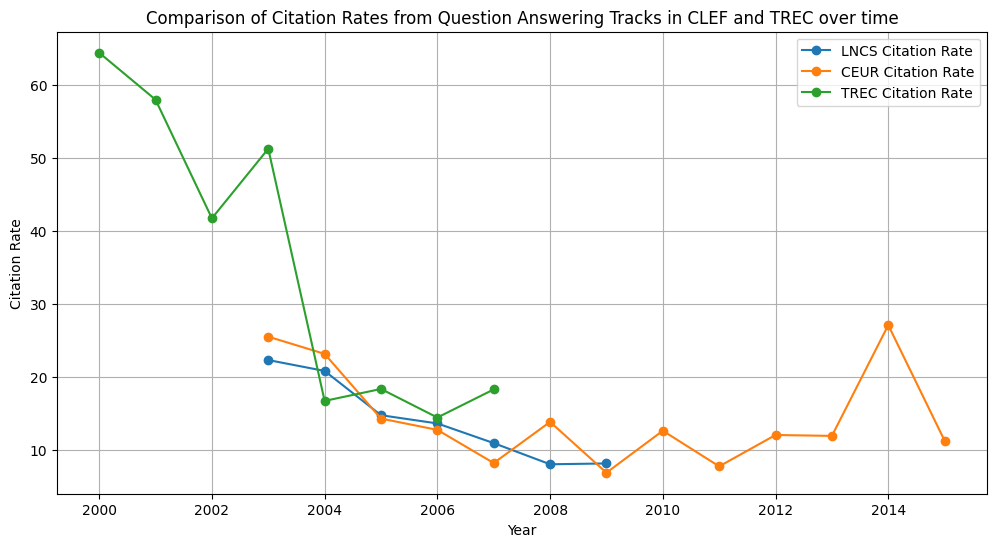

In [40]:
import matplotlib.pyplot as plt

# Ensure the years align properly
plt.figure(figsize=(12, 6))

# Plotting LNCS Citation Rates (only the available years)
plt.plot(df_lncs_grouped['PubYear'], df_lncs_grouped['Citation_Rate'], marker='o', label='LNCS Citation Rate')

# Plotting CEUR Citation Rates (only the available years)
plt.plot(df_ceur_grouped['PubYear'], df_ceur_grouped['Citation_Rate'], marker='o', label='CEUR Citation Rate')

# Plotting TREC Citation Rates (only the available years)
plt.plot(df_trec_grouped['PubYear'], df_trec_grouped['Citation_Rate'], marker='o', label='TREC Citation Rate')

plt.title('Comparison of Citation Rates from Question Answering Tracks in CLEF and TREC over time')
plt.xlabel('Year')
plt.ylabel('Citation Rate')
plt.legend()
plt.grid(True)
plt.savefig('../../../images/qa_citation_rate_comparison.png', dpi=300)  # Save the figure as a PNG file with 300 dpi
plt.show()

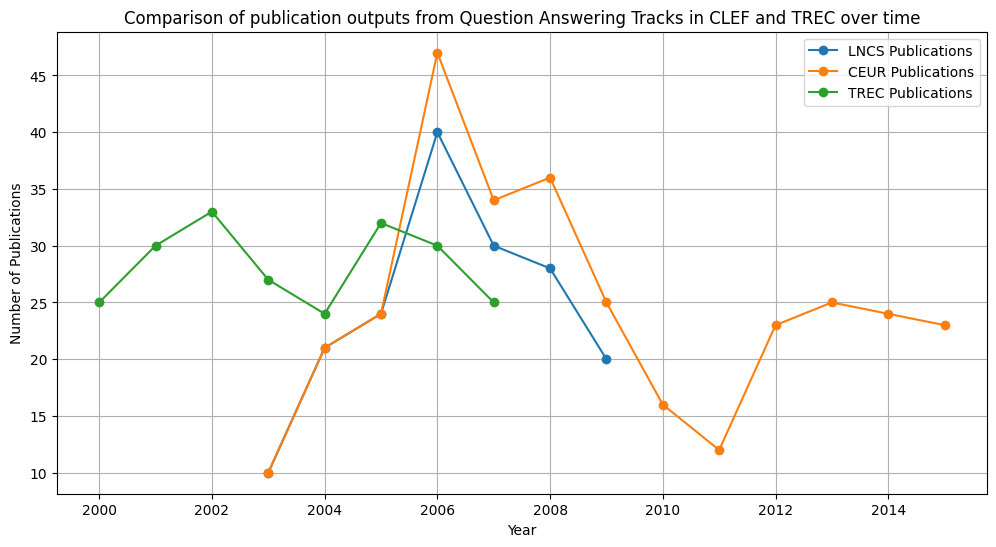

In [41]:
plt.figure(figsize=(12, 6))

# Plotting LNCS Publication Outputs
plt.plot(df_lncs_grouped['PubYear'], df_lncs_grouped['Title'], marker='o', label='LNCS Publications')

# Plotting CEUR Publication Outputs
plt.plot(df_ceur_grouped['PubYear'], df_ceur_grouped['Title'], marker='o', label='CEUR Publications')

# Plotting TREC Publication Outputs
plt.plot(df_trec_grouped['PubYear'], df_trec_grouped['Title'], marker='o', label='TREC Publications')

plt.title('Comparison of publication outputs from Question Answering Tracks in CLEF and TREC over time')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.legend()
plt.grid(True)
plt.savefig('../../../images/qa_publication_output_comparison.png', dpi=300)  # Save the figure as a PNG file with 300 dpi
plt.show()

In [21]:
# Filter CEUR for Question Answering Labs
df_ceur_filtered = df_ceur[df_ceur["Labs"].apply(lambda x: "INFILE" in x)]

# Filter LNCS for QA@CLEF Labs
df_lncs_filtered = df_lncs[df_lncs["Labs"] == "INFILE"]

# Filter TREC for Question Answering Tracks
df_trec_filtered = df_trec[df_trec["Tracks"].apply(lambda x: "Filtering" in x)]

In [22]:
df_ceur_filtered

,PubYear,CEUR Title,Volume,filename,Title,Section,Authors,url,ID,Labs,Citations_semantic,Citations_OpenAlex
1920,2008,Working Notes for CLEF 2008 Workshop,Vol-1174,CLEF2008wn-INFILE-BesanconEt2008.pdf,Overview of CLEF 2008 INFILE Pilot Track,Multilingual Information Filtering,"[Romaric Besancon, Stéphane Chaudiron, Djamel ...",https://ceur-ws.org/Vol-1174/CLEF2008wn-INFILE...,ceur_2095,[INFILE],13.0,7.0
1921,2008,Working Notes for CLEF 2008 Workshop,Vol-1174,CLEF2008wn-INFILE-GaussierEt2008.pdf,Working Notes for the InFile Campaign : Online...,Multilingual Information Filtering,"[Eric Gaussier, Ali Mustafa Qamar, Vincent Bod...",https://ceur-ws.org/Vol-1174/CLEF2008wn-INFILE...,ceur_2096,[INFILE],3.0,2.0
2509,2009,Working Notes for CLEF 2009 Workshop,Vol-1175,CLEF2009wn-INFILE-kierkelsEt2009.pdf,Identification of Narrative Peaks in Clips: Te...,Multilingual Information Filtering,"[Joep J.M. Kierkels, Mohammad Soleymani, Thier...",https://ceur-ws.org/Vol-1175/CLEF2009wn-INFILE...,ceur_1484,[INFILE],2.0,1.0
2510,2009,Working Notes for CLEF 2009 Workshop,Vol-1175,CLEF2009wn-INFILE-BesanconEt2009.pdf,Overview of CLEF 2009 INFILE track,Multilingual Information Filtering,"[Romaric Besançon, Stéphane Chaudiron, Djamel ...",https://ceur-ws.org/Vol-1175/CLEF2009wn-INFILE...,ceur_1485,[INFILE],3.0,0.0
2511,2009,Working Notes for CLEF 2009 Workshop,Vol-1175,CLEF2009wn-INFILE-QamarEt2009.pdf,Batch Document Filtering Using Nearest Neighbo...,Multilingual Information Filtering,"[Ali Mustafa Qamar, Eric Gaussier, Nathalie De...",https://ceur-ws.org/Vol-1175/CLEF2009wn-INFILE...,ceur_1486,[INFILE],1.0,1.0
2512,2009,Working Notes for CLEF 2009 Workshop,Vol-1175,CLEF2009wn-INFILE-RonaldEt2009.pdf,Hosur'Tech Participation in Interactive INFILE,Multilingual Information Filtering,"[John Anton Chrisostom Ronald, Aurélie Rossi, ...",https://ceur-ws.org/Vol-1175/CLEF2009wn-INFILE...,ceur_1487,[INFILE],0.0,0.0
2513,2009,Working Notes for CLEF 2009 Workshop,Vol-1175,CLEF2009wn-INFILE-DragusanuEt2009.pdf,UAIC: Participation in INFILE@CLEF Task,Multilingual Information Filtering,"[Cristian-Alexandru Drăguşanu, Alecsandru Grig...",https://ceur-ws.org/Vol-1175/CLEF2009wn-INFILE...,ceur_1488,[INFILE],0.0,0.0
2514,2009,Working Notes for CLEF 2009 Workshop,Vol-1175,CLEF2009wn-INFILE-MontejoRaezEt2009.pdf,SINAI at INFILE 2009: Experiments with Google ...,Multilingual Information Filtering,"[Arturo Montejo-Ráez, Jos e M. Perea-Ortega, M...",https://ceur-ws.org/Vol-1175/CLEF2009wn-INFILE...,ceur_1489,[INFILE],0.0,0.0
2515,2009,Working Notes for CLEF 2009 Workshop,Vol-1175,CLEF2009wn-INFILE-DamankeshEt2009.pdf,Using Human Plausible Reasoning as a Framework...,Multilingual Information Filtering,"[Asma Damankesh, Jaspreet Singh, Fatima Jahedp...",https://ceur-ws.org/Vol-1175/CLEF2009wn-INFILE...,ceur_1490,[INFILE],7.0,0.0


In [23]:
df_trec_filtered

,PubYear,url,Authors,Title,Section,filename,filepath,ID,Citations_semantic,Citations_OpenAlex,Tracks
2,2000,http://trec.nist.gov/pubs/trec9/papers/filteri...,"[Stephen E. Robertson, David A. Hull]",The TREC-9 Filtering Track Final Report.,Uncategorized,filtering_new.pdf,D:/Studium/Masterarbeit/PythonProject/data/PDF...,trec_3,34.0,66.0,[Filtering]
16,2000,http://trec.nist.gov/pubs/trec9/papers/iowa.pdf,"[Elena Catona, David Eichmann, Padmini Sriniva...",Filters and Answers: The University of Iowa TR...,Uncategorized,iowa.pdf,D:/Studium/Masterarbeit/PythonProject/data/PDF...,trec_17,0.0,NaN,"[Question Answering, Filtering]"
18,2000,http://trec.nist.gov/pubs/trec9/papers/msrc-fq...,"[Stephen E. Robertson, Steve Walker]",Microsoft Cambridge at TREC-9: Filtering Track.,Uncategorized,msrc-fq.pdf,D:/Studium/Masterarbeit/PythonProject/data/PDF...,trec_19,56.0,NaN,[Filtering]
21,2000,http://trec.nist.gov/pubs/trec9/papers/cmucat.pdf,"[Tom Ault, Yiming Yang]",kNN at TREC-9.,Uncategorized,cmucat.pdf,D:/Studium/Masterarbeit/PythonProject/data/PDF...,trec_22,14.0,5.0,[Filtering]
22,2000,http://trec.nist.gov/pubs/trec9/papers/cmu-dir...,"[Yi Zhang, James P. Callan]",YFilter at TREC-9.,Uncategorized,cmu-dirtrec9.pdf,D:/Studium/Masterarbeit/PythonProject/data/PDF...,trec_23,15.0,5.0,[Filtering]
27,2000,http://trec.nist.gov/pubs/trec9/papers/FduT9Re...,"[Lide Wu, Xuanjing Huang, Yikun Guo, Bingwei L...","FDU at TREC-9: CLIR, Filtering and QA Tasks.",Uncategorized,FduT9Report.pdf,D:/Studium/Masterarbeit/PythonProject/data/PDF...,trec_28,20.0,5.0,"[Question Answering, Cross-Language, Filtering]"
32,2000,http://trec.nist.gov/pubs/trec9/papers/icdc_fi...,"[Mathieu Stricker, Frantz Vichot, Gérard Dreyf...",Training Context-Sensitive Neural Networks wit...,Uncategorized,icdc_final.pdf,D:/Studium/Masterarbeit/PythonProject/data/PDF...,trec_33,11.0,3.0,[Filtering]
33,2000,http://trec.nist.gov/pubs/trec9/papers/irit_tr...,"[M. Abchiche, Mohand Boughanem, Taoufiq Dkaki,...",Mercure at trec9: Web and Filtering tasks.,Uncategorized,irit_trec9.pdf,D:/Studium/Masterarbeit/PythonProject/data/PDF...,trec_34,11.0,4.0,"[Web, Filtering]"
35,2000,http://trec.nist.gov/pubs/trec9/papers/kddtrec...,"[Keiichiro Hoashi, Kazunori Matsumoto, Naomi I...",Experiments on the TREC-9 Filtering Track.,Uncategorized,kddtrec9.pdf,D:/Studium/Masterarbeit/PythonProject/data/PDF...,trec_36,1.0,1.0,[Filtering]
36,2000,http://trec.nist.gov/pubs/trec9/papers/kaist-t...,"[Kyung-Soon Lee, Jong-Hoon Oh, Jin-Xia Huang, ...","TREC-9 Experiments at KAIST: QA, CLIR and Batc...",Uncategorized,kaist-trec9-qa-filtering.pdf,D:/Studium/Masterarbeit/PythonProject/data/PDF...,trec_37,15.0,9.0,"[Question Answering, Cross-Language, Filtering]"


In [24]:
# Group by Year and calculate metrics
df_ceur_grouped = df_ceur_filtered.groupby('PubYear').agg({
    'Citations_semantic': 'sum', 
    'Title': 'count'
}).reset_index()

df_ceur_grouped['Citation_Rate'] = df_ceur_grouped['Citations_semantic'] / df_ceur_grouped['Title']

df_lncs_grouped = df_lncs_filtered.groupby('PubYear').agg({
    'Citations_semantic': 'sum', 
    'Title': 'count'
}).reset_index()

df_lncs_grouped['Citation_Rate'] = df_lncs_grouped['Citations_semantic'] / df_lncs_grouped['Title']

df_trec_grouped = df_trec_filtered.groupby('PubYear').agg({
    'Citations_semantic': 'sum', 
    'Title': 'count'
}).reset_index()

df_trec_grouped['Citation_Rate'] = df_trec_grouped['Citations_semantic'] / df_trec_grouped['Title']

In [25]:
# Merge dataframes on 'PubYear'
df_combined = df_ceur_grouped.merge(df_lncs_grouped, on='PubYear', how='outer', suffixes=('_CEUR', '_LNCS'))
df_combined = df_combined.merge(df_trec_grouped, on='PubYear', how='outer', suffixes=('', '_TREC'))

# Rename columns for clarity
df_combined.columns = ['PubYear', 'Citations_semantic_CEUR', 'Title_CEUR', 'Citation_Rate_CEUR',
                       'Citations_semantic_LNCS', 'Title_LNCS', 'Citation_Rate_LNCS',
                       'Citations_semantic_TREC', 'Title_TREC', 'Citation_Rate_TREC']

In [26]:
df_combined

,PubYear,Citations_semantic_CEUR,Title_CEUR,Citation_Rate_CEUR,Citations_semantic_LNCS,Title_LNCS,Citation_Rate_LNCS,Citations_semantic_TREC,Title_TREC,Citation_Rate_TREC
0,2000,NaN,NaN,NaN,NaN,NaN,NaN,227.0,13.0,17.461538
1,2001,NaN,NaN,NaN,NaN,NaN,NaN,201.0,13.0,15.461538
2,2002,NaN,NaN,NaN,NaN,NaN,NaN,588.0,19.0,30.947368
3,2008,16.0,2.0,8.000000,13.0,2.0,6.5,NaN,NaN,NaN
4,2009,13.0,7.0,1.857143,15.0,6.0,2.5,NaN,NaN,NaN


In [27]:
latex_table = df_combined.to_latex(index=False, float_format="%.2f", na_rep="NA")
print(latex_table)

\begin{tabular}{rrrrrrrrrr}
\toprule
PubYear & Citations_semantic_CEUR & Title_CEUR & Citation_Rate_CEUR & Citations_semantic_LNCS & Title_LNCS & Citation_Rate_LNCS & Citations_semantic_TREC & Title_TREC & Citation_Rate_TREC \\
\midrule
2000 & NA & NA & NA & NA & NA & NA & 227.00 & 13.00 & 17.46 \\
2001 & NA & NA & NA & NA & NA & NA & 201.00 & 13.00 & 15.46 \\
2002 & NA & NA & NA & NA & NA & NA & 588.00 & 19.00 & 30.95 \\
2008 & 16.00 & 2.00 & 8.00 & 13.00 & 2.00 & 6.50 & NA & NA & NA \\
2009 & 13.00 & 7.00 & 1.86 & 15.00 & 6.00 & 2.50 & NA & NA & NA \\
\bottomrule
\end{tabular}



In [42]:
# Filter CEUR for Question Answering Labs
df_ceur_filtered = df_ceur[df_ceur["Labs"].apply(lambda x: "CENTRE@CLEF" in x)]

# Filter TREC for Question Answering Tracks
df_trec_filtered = df_trec[df_trec["Tracks"].apply(lambda x: "CENTRE" in x)]

In [43]:
# Group by Year and calculate metrics
df_ceur_grouped = df_ceur_filtered.groupby('PubYear').agg({
    'Citations_semantic': 'sum', 
    'Title': 'count'
}).reset_index()

df_ceur_grouped['Citation_Rate'] = df_ceur_grouped['Citations_semantic'] / df_ceur_grouped['Title']

df_trec_grouped = df_trec_filtered.groupby('PubYear').agg({
    'Citations_semantic': 'sum', 
    'Title': 'count'
}).reset_index()

df_trec_grouped['Citation_Rate'] = df_trec_grouped['Citations_semantic'] / df_trec_grouped['Title']

In [44]:
df_trec_grouped

,PubYear,Citations_semantic,Title,Citation_Rate
0,2018,10.0,3,3.333333


In [45]:
# Merge dataframes on 'PubYear'
df_combined = df_ceur_grouped.merge(df_trec_grouped, on='PubYear', how='outer', suffixes=('_CEUR', '_LNCS'))
# Rename columns for clarity
df_combined.columns = ['PubYear', 'Citations_semantic_CEUR', 'Title_CEUR', 'Citation_Rate_CEUR',
                       'Citations_semantic_TREC', 'Title_TREC', 'Citation_Rate_TREC']

In [46]:
latex_table = df_combined.to_latex(index=False, float_format="%.2f", na_rep="NA")
print(latex_table)

\begin{tabular}{rrrrrrr}
\toprule
PubYear & Citations_semantic_CEUR & Title_CEUR & Citation_Rate_CEUR & Citations_semantic_TREC & Title_TREC & Citation_Rate_TREC \\
\midrule
2018 & 14.00 & 2 & 7.00 & 10.00 & 3.00 & 3.33 \\
2019 & 9.00 & 2 & 4.50 & NA & NA & NA \\
\bottomrule
\end{tabular}



In [47]:
# Filter CEUR for Question Answering Labs
df_ceur_filtered = df_ceur[df_ceur["Labs"].apply(lambda x: "eHealth" in x)]

# Filter TREC for Question Answering Tracks
df_trec_filtered = df_trec[df_trec["Tracks"].apply(lambda x: "Clinical Decision Support" in x)]

In [48]:
# Group by Year and calculate metrics
df_ceur_grouped = df_ceur_filtered.groupby('PubYear').agg({
    'Citations_semantic': 'sum', 
    'Title': 'count'
}).reset_index()

df_ceur_grouped['Citation_Rate'] = df_ceur_grouped['Citations_semantic'] / df_ceur_grouped['Title']

df_trec_grouped = df_trec_filtered.groupby('PubYear').agg({
    'Citations_semantic': 'sum', 
    'Title': 'count'
}).reset_index()

df_trec_grouped['Citation_Rate'] = df_trec_grouped['Citations_semantic'] / df_trec_grouped['Title']

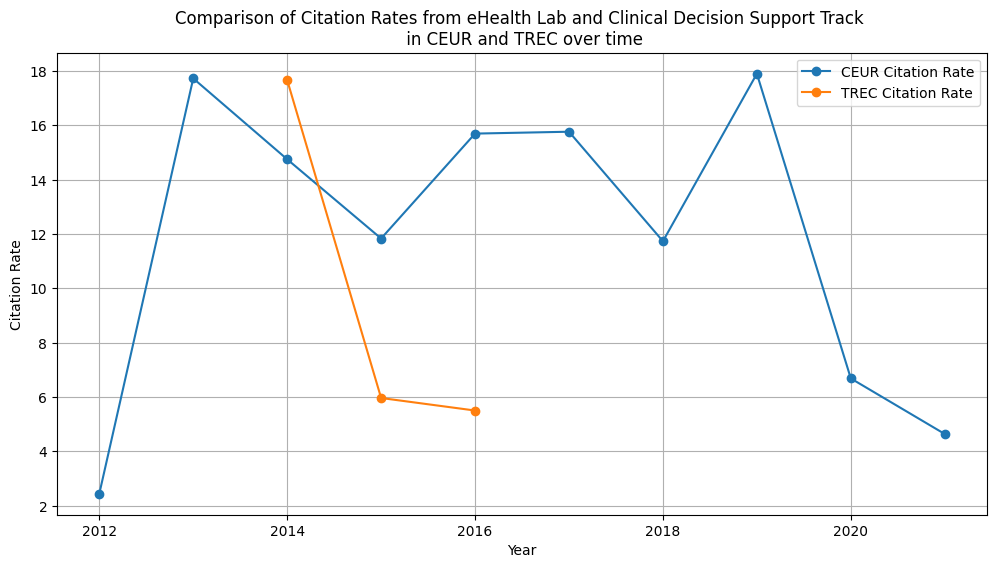

In [52]:
import matplotlib.pyplot as plt

# Ensure the years align properly
plt.figure(figsize=(12, 6))

# Plotting CEUR Citation Rates (only the available years)
plt.plot(df_ceur_grouped['PubYear'], df_ceur_grouped['Citation_Rate'], marker='o', label='CEUR Citation Rate')

# Plotting TREC Citation Rates (only the available years)
plt.plot(df_trec_grouped['PubYear'], df_trec_grouped['Citation_Rate'], marker='o', label='TREC Citation Rate')

plt.title('Comparison of Citation Rates from eHealth Lab and Clinical Decision Support Track \n in CEUR and TREC over time')
plt.xlabel('Year')
plt.ylabel('Citation Rate')
plt.legend()
plt.grid(True)
plt.savefig('../../../images/medical_citation_rate_comparison.png', dpi=300)  # Save the figure as a PNG file with 300 dpi
plt.show()

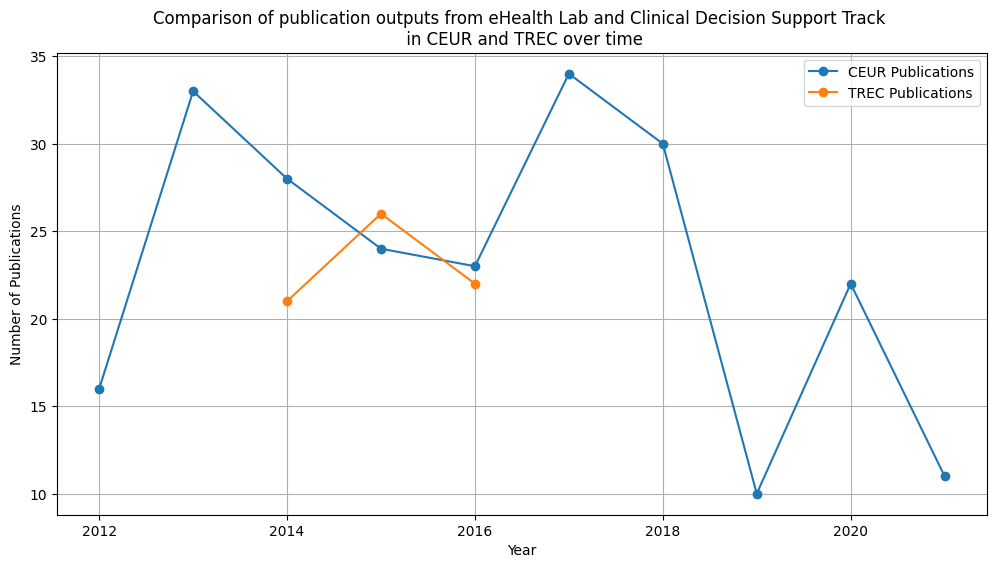

In [51]:
plt.figure(figsize=(12, 6))

# Plotting CEUR Publication Outputs
plt.plot(df_ceur_grouped['PubYear'], df_ceur_grouped['Title'], marker='o', label='CEUR Publications')

# Plotting TREC Publication Outputs
plt.plot(df_trec_grouped['PubYear'], df_trec_grouped['Title'], marker='o', label='TREC Publications')

plt.title('Comparison of publication outputs from eHealth Lab and Clinical Decision Support Track \n in CEUR and TREC over time')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.legend()
plt.grid(True)
plt.savefig('../../../images/medical_publication_output_comparison.png', dpi=300)  # Save the figure as a PNG file with 300 dpi
plt.show()

In [38]:
# Filter CEUR for Question Answering Labs
df_ceur_filtered = df_ceur[df_ceur["Labs"].apply(lambda x: "CL-SDR" in x)]

# Filter LNCS for QA@CLEF Labs
df_lncs_filtered = df_lncs[df_lncs["Labs"] == "CL-SDR"]

# Filter TREC for Question Answering Tracks
df_trec_filtered = df_trec[df_trec["Tracks"].apply(lambda x: "Spoken Document Retrieval" in x)]

In [39]:
df_lncs_filtered

,PubYear,Book Subtitle,Book Title,Filename,Title,Section,Subsection,DOI,Citation count,Authors & Affiliations,ID,Labs,Citations_semantic,Citations_OpenAlex
266,2004,5th Workshop of the Cross-Language Evaluation ...,"Multilingual Information Access for Text, Spee...",11519645_79.pdf,CLEF 2004 Cross-Language Spoken Document Retri...,Part VI. Cross-Language Spoken Document Retrieval,Uncategorized,https://doi.org/10.1007/11519645_79,7,"[['ITC-irst, Italy', ['Marcello Federico', 'Ni...",lncs_270,CL-SDR,22.0,12
1188,2003,4th Workshop of the Cross-Language Evaluation ...,Comparative Evaluation of Multilingual Informa...,978-3-540-30222-3_61.pdf,The CLEF 2003 Cross-Language Spoken Document R...,Part VI. Cross-Language Spoken Document Retrieval,Uncategorized,https://doi.org/10.1007/978-3-540-30222-3_61,12,"[['ITC-irst, Trento, Italy', ['Marcello Federi...",lncs_1307,CL-SDR,16.0,13
1189,2003,4th Workshop of the Cross-Language Evaluation ...,Comparative Evaluation of Multilingual Informa...,978-3-540-30222-3_62.pdf,Exeter at CLEF 2003: Cross-Language Spoken Doc...,Part VI. Cross-Language Spoken Document Retrieval,Uncategorized,https://doi.org/10.1007/978-3-540-30222-3_62,1,"[['Department of Computer Science, University ...",lncs_1308,CL-SDR,6.0,2
1190,2003,4th Workshop of the Cross-Language Evaluation ...,Comparative Evaluation of Multilingual Informa...,978-3-540-30222-3_63.pdf,N-Grams for Translation and Retrieval in CL-SDR,Part VI. Cross-Language Spoken Document Retrieval,Uncategorized,https://doi.org/10.1007/978-3-540-30222-3_63,2,"[['Applied Physics Laboratory, The Johns Hopki...",lncs_1309,CL-SDR,4.0,2
1191,2003,4th Workshop of the Cross-Language Evaluation ...,Comparative Evaluation of Multilingual Informa...,978-3-540-30222-3_64.pdf,Spoken Document Retrieval Experiments with IR-...,Part VI. Cross-Language Spoken Document Retrieval,Uncategorized,https://doi.org/10.1007/978-3-540-30222-3_64,2,[['Grupo de investigación en Procesamiento del...,lncs_1310,CL-SDR,6.0,2
1192,2003,4th Workshop of the Cross-Language Evaluation ...,Comparative Evaluation of Multilingual Informa...,978-3-540-30222-3_65.pdf,ITC-irst at CLEF 2003: Cross-Language Spoken D...,Part VI. Cross-Language Spoken Document Retrieval,Uncategorized,https://doi.org/10.1007/978-3-540-30222-3_65,1,"[['ITC-irst, Centro per la Ricerca Scientifica...",lncs_1311,CL-SDR,3.0,2


In [40]:
# Group by Year and calculate metrics
df_ceur_grouped = df_ceur_filtered.groupby('PubYear').agg({
    'Citations_semantic': 'sum', 
    'Title': 'count'
}).reset_index()

df_ceur_grouped['Citation_Rate'] = df_ceur_grouped['Citations_semantic'] / df_ceur_grouped['Title']

df_lncs_grouped = df_lncs_filtered.groupby('PubYear').agg({
    'Citations_semantic': 'sum', 
    'Title': 'count'
}).reset_index()

df_lncs_grouped['Citation_Rate'] = df_lncs_grouped['Citations_semantic'] / df_lncs_grouped['Title']

df_trec_grouped = df_trec_filtered.groupby('PubYear').agg({
    'Citations_semantic': 'sum', 
    'Title': 'count'
}).reset_index()

df_trec_grouped['Citation_Rate'] = df_trec_grouped['Citations_semantic'] / df_trec_grouped['Title']

In [41]:
# Merge dataframes on 'PubYear'
df_combined = df_ceur_grouped.merge(df_lncs_grouped, on='PubYear', how='outer', suffixes=('_CEUR', '_LNCS'))
df_combined = df_combined.merge(df_trec_grouped, on='PubYear', how='outer', suffixes=('', '_TREC'))

# Rename columns for clarity
df_combined.columns = ['PubYear', 'Citations_semantic_CEUR', 'Title_CEUR', 'Citation_Rate_CEUR',
                       'Citations_semantic_LNCS', 'Title_LNCS', 'Citation_Rate_LNCS',
                       'Citations_semantic_TREC', 'Title_TREC', 'Citation_Rate_TREC']

In [103]:
latex_table = df_combined.to_latex(index=False, float_format="%.2f", na_rep="NA")
print(latex_table)

\begin{tabular}{rrrrrrrrrr}
\toprule
PubYear & Citations_semantic_CEUR & Title_CEUR & Citation_Rate_CEUR & Citations_semantic_LNCS & Title_LNCS & Citation_Rate_LNCS & Citations_semantic_TREC & Title_TREC & Citation_Rate_TREC \\
\midrule
2000 & NA & NA & NA & NA & NA & NA & 20.00 & 3.00 & 6.67 \\
2003 & 28.00 & 3.00 & 9.33 & 35.00 & 5.00 & 7.00 & NA & NA & NA \\
2004 & 22.00 & 1.00 & 22.00 & 22.00 & 1.00 & 22.00 & NA & NA & NA \\
\bottomrule
\end{tabular}



In [42]:
# Filter CEUR for Question Answering Labs
df_ceur_filtered = df_ceur[df_ceur["Labs"].apply(lambda x: "CL-SDR" in x)]

# Filter LNCS for QA@CLEF Labs
df_lncs_filtered = df_lncs[df_lncs["Labs"] == "CL-SDR"]

# Filter TREC for Question Answering Tracks
df_trec_filtered = df_trec[df_trec["Tracks"].apply(lambda x: "Spoken Document Retrieval" in x)]

In [43]:
# Group by Year and calculate metrics
df_ceur_grouped = df_ceur_filtered.groupby('PubYear').agg({
    'Citations_semantic': 'sum', 
    'Title': 'count'
}).reset_index()

df_ceur_grouped['Citation_Rate'] = df_ceur_grouped['Citations_semantic'] / df_ceur_grouped['Title']

df_lncs_grouped = df_lncs_filtered.groupby('PubYear').agg({
    'Citations_semantic': 'sum', 
    'Title': 'count'
}).reset_index()

df_lncs_grouped['Citation_Rate'] = df_lncs_grouped['Citations_semantic'] / df_lncs_grouped['Title']

df_trec_grouped = df_trec_filtered.groupby('PubYear').agg({
    'Citations_semantic': 'sum', 
    'Title': 'count'
}).reset_index()

df_trec_grouped['Citation_Rate'] = df_trec_grouped['Citations_semantic'] / df_trec_grouped['Title']

In [44]:
# Merge dataframes on 'PubYear'
df_combined = df_ceur_grouped.merge(df_lncs_grouped, on='PubYear', how='outer', suffixes=('_CEUR', '_LNCS'))
df_combined = df_combined.merge(df_trec_grouped, on='PubYear', how='outer', suffixes=('', '_TREC'))

# Rename columns for clarity
df_combined.columns = ['PubYear', 'Citations_semantic_CEUR', 'Title_CEUR', 'Citation_Rate_CEUR',
                       'Citations_semantic_LNCS', 'Title_LNCS', 'Citation_Rate_LNCS',
                       'Citations_semantic_TREC', 'Title_TREC', 'Citation_Rate_TREC']

In [107]:
latex_table = df_combined.to_latex(index=False, float_format="%.2f", na_rep="NA")
print(latex_table)

\begin{tabular}{rrrrrrrrrr}
\toprule
PubYear & Citations_semantic_CEUR & Title_CEUR & Citation_Rate_CEUR & Citations_semantic_LNCS & Title_LNCS & Citation_Rate_LNCS & Citations_semantic_TREC & Title_TREC & Citation_Rate_TREC \\
\midrule
2000 & NA & NA & NA & NA & NA & NA & 20.00 & 3.00 & 6.67 \\
2003 & 28.00 & 3.00 & 9.33 & 35.00 & 5.00 & 7.00 & NA & NA & NA \\
2004 & 22.00 & 1.00 & 22.00 & 22.00 & 1.00 & 22.00 & NA & NA & NA \\
\bottomrule
\end{tabular}



In [45]:
# Filter CEUR for Question Answering Labs
df_ceur_filtered = df_ceur[df_ceur["Labs"].apply(lambda x: "CL-SR" in x)]

# Filter LNCS for QA@CLEF Labs
df_lncs_filtered = df_lncs[df_lncs["Labs"] == "CL-SR"]


In [46]:
# Group by Year and calculate metrics
df_ceur_grouped = df_ceur_filtered.groupby('PubYear').agg({
    'Citations_semantic': 'sum', 
    'Title': 'count'
}).reset_index()

df_ceur_grouped['Citation_Rate'] = df_ceur_grouped['Citations_semantic'] / df_ceur_grouped['Title']

df_lncs_grouped = df_lncs_filtered.groupby('PubYear').agg({
    'Citations_semantic': 'sum', 
    'Title': 'count'
}).reset_index()

df_lncs_grouped['Citation_Rate'] = df_lncs_grouped['Citations_semantic'] / df_lncs_grouped['Title']

In [47]:
# Merge dataframes on 'PubYear'
df_combined = df_ceur_grouped.merge(df_lncs_grouped, on='PubYear', how='outer', suffixes=('_CEUR', '_LNCS'))

# Rename columns for clarity
df_combined.columns = ['PubYear', 'Citations_semantic_CEUR', 'Title_CEUR', 'Citation_Rate_CEUR',
                       'Citations_semantic_LNCS', 'Title_LNCS', 'Citation_Rate_LNCS',
                       ]

In [48]:
latex_table = df_combined.to_latex(index=False, float_format="%.2f", na_rep="NA")
print(latex_table)

\begin{tabular}{rrrrrrr}
\toprule
PubYear & Citations_semantic_CEUR & Title_CEUR & Citation_Rate_CEUR & Citations_semantic_LNCS & Title_LNCS & Citation_Rate_LNCS \\
\midrule
2005 & 145.00 & 8 & 18.12 & 162.00 & 7 & 23.14 \\
2006 & 9.00 & 7 & 1.29 & 23.00 & 7 & 3.29 \\
2007 & 21.00 & 9 & 2.33 & 20.00 & 6 & 3.33 \\
\bottomrule
\end{tabular}

